Сборный проект №1. Исследование рынка видеоигр, перспективы развития в 2017 году. 

    Цель проекта: Выявить определяющие успешность игр закономерности. Определить потенциально популярные продукты и подготовить базу для планировани рекламной кампании интернет-магазина «Стримчик».
    Данные: Исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы с 1977-2016. Данные за 2016 год неполные. 
    Выделим этапы нашего исследования:
    Шаг 1. Изучить общую информацию о данных.
    Шаг 2. Подготовь данные
    Шаг 3. Проведите исследовательский анализ данных:
        Динамика кол-во выпускаемых игр.
        Различие продаж по платформам.
        Выделение актуального периода для прогноза продаж в 2017 году.
        Влияние оценок игроков и прессы на продажи
        Различие продаж по жанрам.
    Шаг 4. Составьте портрет пользователя каждого региона  
    Шаг 5. Проверьте гипотезы:
        Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
        Средние пользовательские рейтинги жанров Action  и Sports
        
 

## Знакомство с данными 

In [1]:
#импортируем библиотеки 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np
df = pd.read_csv('/datasets/games.csv')

#избавление от Экспоненциальной записи
pd.options.display.float_format = '{:,.2f}'.format 
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
# переведем названия колонок к виду snake_case
df.columns = df.columns.str.lower()

In [3]:
df.info()
#
print('явных дубликатов:',df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
явных дубликатов: 0


In [4]:
#посмотрим сколько пропусков в давнных в разных столбцах
for i in df.columns:
        if df[i].isna().sum() > 0: 
            print(i, ':',df[i].isna().sum(), 'NaN') 
            print(round((df[i].isna().sum()/len(df['platform'])*100),2),'%')
            

name : 2 NaN
0.01 %
year_of_release : 269 NaN
1.61 %
genre : 2 NaN
0.01 %
critic_score : 8578 NaN
51.32 %
user_score : 6701 NaN
40.09 %
rating : 6766 NaN
40.48 %


В данных есть информация о 16715 играх с 1977 по 2016,во многих столбцах есть пропуски, явные дубликаты отсутствуют. Для некоторых стобцов тип данных не соответсвует содержимому.Название столбцов не соответсовало виду "snake_case".

## Подготовка данных

In [5]:
#посмотрим пропуски в столбце с назвнием игры:
df[df['name'].isna()]



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [6]:
#удалим пропуски
df = df.dropna(subset = ['name'])
#Так можно было сбросить индексы, но я по ним заполнян даты релиза и не хоелост бы пределывать.
#df = df.dropna(subset = ['name']).reset_index(drop=True)

In [7]:
#проверим
df['name'].isna().sum()

0

In [8]:
#проверим удалились ли пропуски в столбце жанр
df['genre'].isna().sum()

0

In [9]:
#посмотрим пропуски в столбце с датой релиза:
pd.set_option('display.max_rows', 270)
df[df['year_of_release'].isna()].sort_values(by=['na_sales'],ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.00,tbd,E
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.00,8.2,T
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.00,6.6,E10+
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.00,6.3,T
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.00,6.7,T


В стобце 269 пропусков, можно было бы их удалить, так как видимой закономерности возникновения их установить не удалось, заметив что среди пропусков есть игры с большим количестовом проданных копий, решил востановить данные для игр с более чем  500 тыс проданых копий в мире, которых оказалось 52 шт.  

In [10]:
#создадим столбец с количеством продаж по всему миру
df['world_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [11]:
#посмотрим пропуски в столбце с датой релиза отсортироват по глобальным продажам:
pd.set_option('display.max_rows', 270)
df[df['year_of_release'].isna()].sort_values(by=['world_sales'],ascending=False)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.00,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.00,tbd,E,2.40
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.00,6.6,E10+,2.33
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.00,6.7,T,2.24
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.00,6.3,T,2.09


In [12]:
#отсортируем игры у корорых пропущена дата релиза и кол-во продаж больше 1/2 миллиона.
general_sales_nan_year_of_release=df[(df['year_of_release'].isna())&(df['world_sales']>0.5)]
display(general_sales_nan_year_of_release)



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.00,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.00,tbd,E,2.40
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.00,6.6,E10+,2.33
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.00,6.7,T,2.24
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.00,6.3,T,2.09


In [13]:
#создадим список индексов, что бы не перепечатывать их вручную 
#list(general_sales_nan_year_of_release.index.values)

In [14]:
# заполним соответствующие ячейки, найдя информацию о дате релиза
df.loc[183, 'year_of_release']=2003
df.loc[377, 'year_of_release']=2003
df.loc[456, 'year_of_release']=2008
df.loc[475, 'year_of_release']=2005
df.loc[609, 'year_of_release']=1978
df.loc[627, 'year_of_release']=2007
df.loc[678, 'year_of_release']=2001
df.loc[719, 'year_of_release']=2006
df.loc[805, 'year_of_release']=2007
df.loc[1131, 'year_of_release']=2010
df.loc[1142, 'year_of_release']=2007
df.loc[1301, 'year_of_release']=1998
df.loc[1506, 'year_of_release']=1979
df.loc[1538, 'year_of_release']=2008
df.loc[1585, 'year_of_release']=1977
df.loc[1609, 'year_of_release']=2011
df.loc[1650, 'year_of_release']=2002
df.loc[1699, 'year_of_release']=2002
df.loc[1840, 'year_of_release']=2007
df.loc[1984, 'year_of_release']=1999
df.loc[2010, 'year_of_release']=1997
df.loc[2106, 'year_of_release']=1977
df.loc[2108, 'year_of_release']=2002
df.loc[2132, 'year_of_release']=2011
df.loc[2157, 'year_of_release']=1992
df.loc[2169, 'year_of_release']=2010
df.loc[2273, 'year_of_release']=2011
df.loc[2281, 'year_of_release']=1995
df.loc[2361, 'year_of_release']=2011
df.loc[2453, 'year_of_release']=2011
df.loc[2479, 'year_of_release']=2006
df.loc[2492, 'year_of_release']=2002
df.loc[2522, 'year_of_release']=2011
df.loc[2536, 'year_of_release']=2008
df.loc[2572, 'year_of_release']=2008
df.loc[2773, 'year_of_release']=2004
df.loc[2849, 'year_of_release']=2010
df.loc[2969, 'year_of_release']=2011
df.loc[3024, 'year_of_release']=2005
df.loc[3081, 'year_of_release']=2011
df.loc[3187, 'year_of_release']=2006
df.loc[3223, 'year_of_release']=2002
df.loc[3233, 'year_of_release']=2011
df.loc[3289, 'year_of_release']=2008
df.loc[3352, 'year_of_release']=2007
df.loc[3413, 'year_of_release']=2005
df.loc[3459, 'year_of_release']=2002
df.loc[3486, 'year_of_release']=2001
df.loc[3704, 'year_of_release']=2004
df.loc[3739, 'year_of_release']=2003
df.loc[3883, 'year_of_release']=1980

In [66]:
#удалим оставшиеся пропуски 
df = df.dropna(subset = ['year_of_release']).reset_index(drop=True)

In [16]:
#display(set(df['Name'].unique()))
#display(set(df['Platform'].unique()))
#display(set(df['Genre'].unique()))
#display(set(df['Critic_Score'].unique()))
#display(set(df['User_Score'].unique()))
#display(set(df['Rating'].unique()))

In [17]:
#посмотрим уникальные значения в разных столбцах
for i in df.columns:
    print(i,':',df[i].unique())
        

name : ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
platform : ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
year_of_release : [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000. 1995. 1991. 1981. 1987. 1980.
 1983. 1978. 1979. 1977.]
genre : ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
na_sales : [4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 

In [18]:
#посмотрим самые популярные платформы 
df['platform'].value_counts(normalize=True)

PS2    0.13
DS     0.13
PS3    0.08
Wii    0.08
X360   0.08
PSP    0.07
PS     0.07
PC     0.06
GBA    0.05
XB     0.05
GC     0.03
3DS    0.03
PSV    0.03
PS4    0.02
N64    0.02
XOne   0.01
SNES   0.01
SAT    0.01
WiiU   0.01
2600   0.01
GB     0.01
NES    0.01
DC     0.00
GEN    0.00
NG     0.00
SCD    0.00
WS     0.00
3DO    0.00
TG16   0.00
PCFX   0.00
GG     0.00
Name: platform, dtype: float64

In [19]:
#Из-за невозможности заполнить пропуски в стобце с возрастным рейтингом заполним  пропуски значением 'Unknown'.
# Посмотрим распределение значений 
df['rating'] = df['rating'].fillna('Unknown')
display(df.rating.value_counts())
display(df.rating.value_counts(normalize=True))

Unknown    6688
E          3934
T          2915
M          1543
E10+       1402
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

Unknown   0.41
E         0.24
T         0.18
M         0.09
E10+      0.08
EC        0.00
K-A       0.00
AO        0.00
RP        0.00
Name: rating, dtype: float64

In [20]:
#Стобцы с небольшим количеством значенией присоединим к более крупным:
#«EC» («Early childhood») — «Для детей младшего возраста» присоединим к Е («Everyone») — «Для всех»
#"K-A" ("Kids to Adults") изначально было вместо «E» («Everyone») — «Для всех»,присоединим к Е(«Everyone») — «Для всех»
#«AO» («Adults Only 18+») — «Только для взрослых» присоединим к М («Mature») — «Для взрослых
#«RP» («Rating Pending») — «Рейтинг ожидается», присоединим к Unknown
df.loc[df['rating'] == 'RP', 'rating'] = 'Unknown'
df.loc[df['rating'] == 'AO', 'rating'] = 'M'
df.loc[df['rating']=='K-A', 'rating'] = 'E'
df.loc[df['rating']=='EC', 'rating'] = 'E'
display(df.rating.value_counts())



Unknown    6689
E          3945
T          2915
M          1544
E10+       1402
Name: rating, dtype: int64

In [22]:
# заполним пропуски в стобцах с оценками критиков на значение '-1', что бы при дальнейшем анализе можно было их легко отсортировать
df['critic_score'] = df['critic_score'].fillna('-1')
df['critic_score'] = df['critic_score'].astype('int')
# заполним пропуски в стобцах с оценками игроков на значение '-1', что бы при дальнейшем анализе можно было их легко отсортировать
#умножим значения на 10, что бы удобнее было сравнивать. 
df.loc[df['user_score'] == 'tbd', 'user_score'] = '-0.1'
df['user_score']=df['user_score'].astype('float')*10
df['user_score'] = df['user_score'].fillna('-1')
df['user_score'] = df['user_score'].astype('int')
#переведем значения в столбце дата релиза в целочисленые 
df['year_of_release'] = df['year_of_release'].astype('int')


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16495 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16495 non-null  object 
 1   platform         16495 non-null  object 
 2   year_of_release  16495 non-null  int64  
 3   genre            16495 non-null  object 
 4   na_sales         16495 non-null  float64
 5   eu_sales         16495 non-null  float64
 6   jp_sales         16495 non-null  float64
 7   other_sales      16495 non-null  float64
 8   critic_score     16495 non-null  int64  
 9   user_score       16495 non-null  int64  
 10  rating           16495 non-null  object 
 11  world_sales      16495 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.6+ MB


In [24]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,85,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,66,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,84,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1,Unknown,28.31


In [25]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,world_sales
count,"16,495.00","16,495.00","16,495.00","16,495.00","16,495.00","16,495.00","16,495.00","16,495.00"
mean,"2,006.47",0.27,0.15,0.08,0.05,33.05,31.86,0.54
std,5.89,0.82,0.51,0.31,0.19,36.32,37.38,1.56
min,"1,977.00",0.00,0.00,0.00,0.00,-1.00,-1.00,0.00
25%,"2,003.00",0.00,0.00,0.00,0.00,-1.00,-1.00,0.06
50%,"2,007.00",0.08,0.02,0.00,0.01,-1.00,-1.00,0.17
75%,"2,010.00",0.24,0.11,0.04,0.03,70.00,73.00,0.48
max,"2,016.00",41.36,28.96,10.22,10.57,98.00,97.00,82.54


В ходе предобработки данных мы удалили всего 213 строчек с пропусками или 1.3% от исходных данных. Больше всего пропусков было в стобцах с оценкой прессы и игроков , а так же в графе с возрастными ограничениями. Пропуски в столбце с возрасным рейтингом мы заполнили значением  "Unknown", а так же присоединили малочисленные категории к крупным. Для пропусков оценок прессы и игроков мы назначили значение "-1", что бы можно было отсортировать в дальнейшем исследовнии. Значение 'tbd' ("Подлежит определению") мы так же присвоили значение "-1.  	

## Анализ данных

In [26]:
df.pivot_table(index='year_of_release', 
               values='name', 
               aggfunc='count')

,name
year_of_release,
1977,2
1978,1
1979,1
1980,10
1981,46
1982,36
1983,17
1984,14
1985,14


<AxesSubplot:title={'center':'Количество игр'}, xlabel='Год', ylabel='Количество выпущенных игр'>

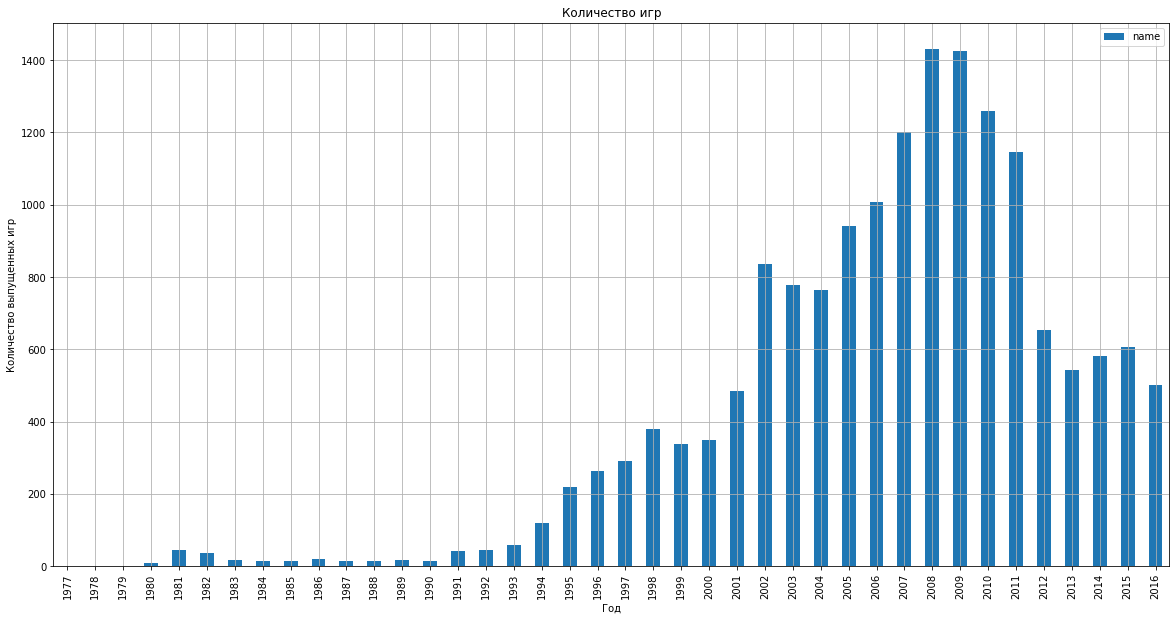

In [27]:
df.pivot_table(index='year_of_release', 
               values='name', 
               aggfunc='count').plot(grid=True,figsize=(20, 10),kind='bar',
                                     title = 'Количество игр',
                                     xlabel = 'Год',
                                     ylabel = 'Количество выпущенных игр')

Первей две игры выпустили в  1977 году до начала 90-ых годов выпускали незначительное кол-во игр. Затем начлася взрывной рост до  2008-2009 года до 1432 игр ежегодно, а затем достаточно быстро началось снижаться, спад остановился в 2013, после кол-во выпускаемых игр снова начло расти.Данные за 2016 не полные.

In [28]:
platform_sales=df.pivot_table(index=['year_of_release', 'platform'],
               values='world_sales', 
               aggfunc='sum')

platform_sales.sort_values(by=['year_of_release','world_sales'],ascending=False)

world_sales
year_of_release platform             
2016            PS4             69.25
                XOne            26.15
                3DS             15.14
                PC               5.25
                WiiU             4.60
                PSV              4.25
                PS3              3.60
                X360             1.52
                Wii              0.18
2015            PS4            118.90
                XOne            60.14
                3DS             27.78
                PS3             16.82
                WiiU            16.35
                X360            11.96
                PC               8.52
                PSV              6.25
                Wii              1.14
                PSP              0.12
2014            PS4            100.00
                XOne            54.07
                PS3             47.76
                3DS             43.76
                X360            34.74
                WiiU            22.03
                PC              13.28
                PSV             11.90
                Wii              3.75
                PSP              0.24
2013            PS3            113.25
                X360            88.58
                3DS             56.57
                PS4             25.99
                WiiU            21.65
                XOne            18.96
                PC              12.38
                PSV             10.59
                Wii              8.59
                PSP              3.14
                DS               1.54
2012            PS3            107.36
                X360            99.74
                3DS             51.36
                PC              23.22
                Wii             21.71
                WiiU            17.56
                PSV             16.19
                DS              11.01
                PSP              7.69
2011            PS3            159.14
                X360           146.33
                3DS             63.20
                Wii             61.77
                PC              35.03
                DS              26.84
                PSP             17.82
                PSV              4.63
                PS2              0.45
2010            X360           170.03
                PS3            143.13
                Wii            128.67
                DS              85.02
                PSP             35.04
                PC              25.90
                PS2              5.64
2009            Wii            206.97
                PS3            130.93
                X360           120.29
                DS             119.54
                PSP             37.78
                PS2             26.40
                PC              16.91
2008            Wii            174.38
                DS             145.91
                X360           136.07
                PS3            118.52
                PS2             53.90
                PSP             36.63
                PC              12.42
                XB               0.18
                DC               0.04
2007            Wii            155.47
                DS             146.94
                X360            97.88
                PS2             77.11
                PS3             74.81
                PSP             46.93
                PC               9.28
                GBA              3.40
                XB               0.55
                GC               0.27
                DC               0.02
2006            Wii            139.39
                DS             119.81
                PS2            104.05
                PSP             56.16
                X360            51.62
                PS3             20.96
                GC              11.26
                XB              10.04
                GBA              5.28
                PC               2.85
2005            PS2            163.66
                DS             130.1

<AxesSubplot:title={'center':'Количество игр'}, xlabel='Год', ylabel='Количество выпущенных игр'>

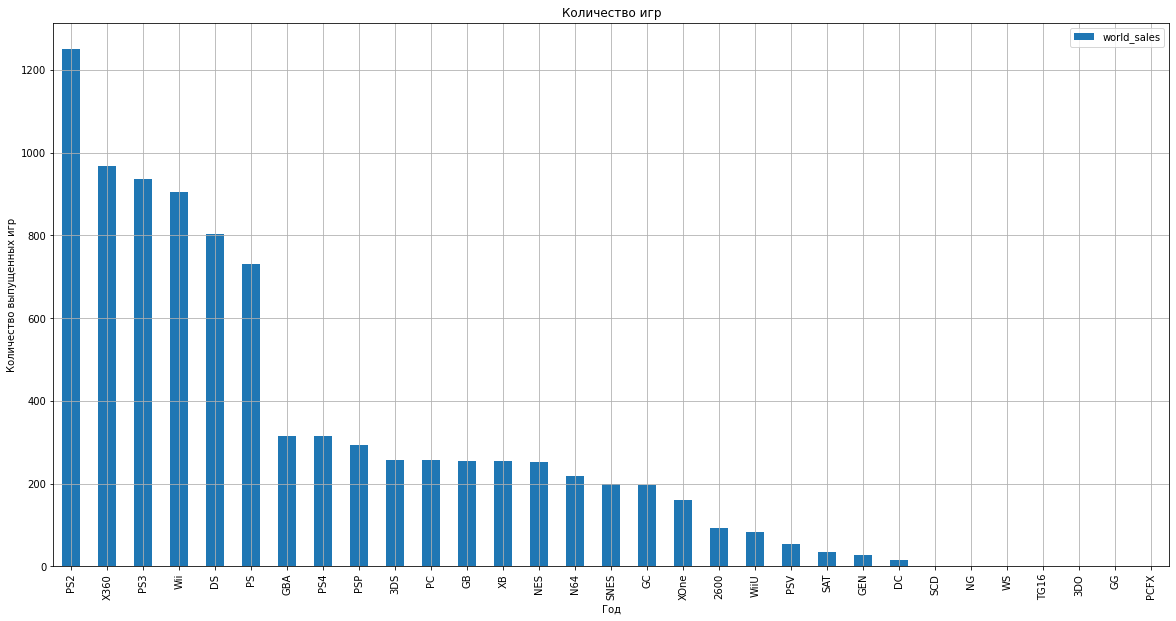

In [78]:
df.pivot_table(index='platform', 
               values='world_sales', 
               aggfunc=sum).sort_values(by=['world_sales'],ascending=False).plot(grid=True,figsize=(20, 10),kind='bar',
                                     title = 'Количество игр',
                                     xlabel = 'Год',
                                     ylabel = 'Количество выпущенных игр')

In [29]:
x_var = 'year_of_release'
groupby_var = 'platform'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

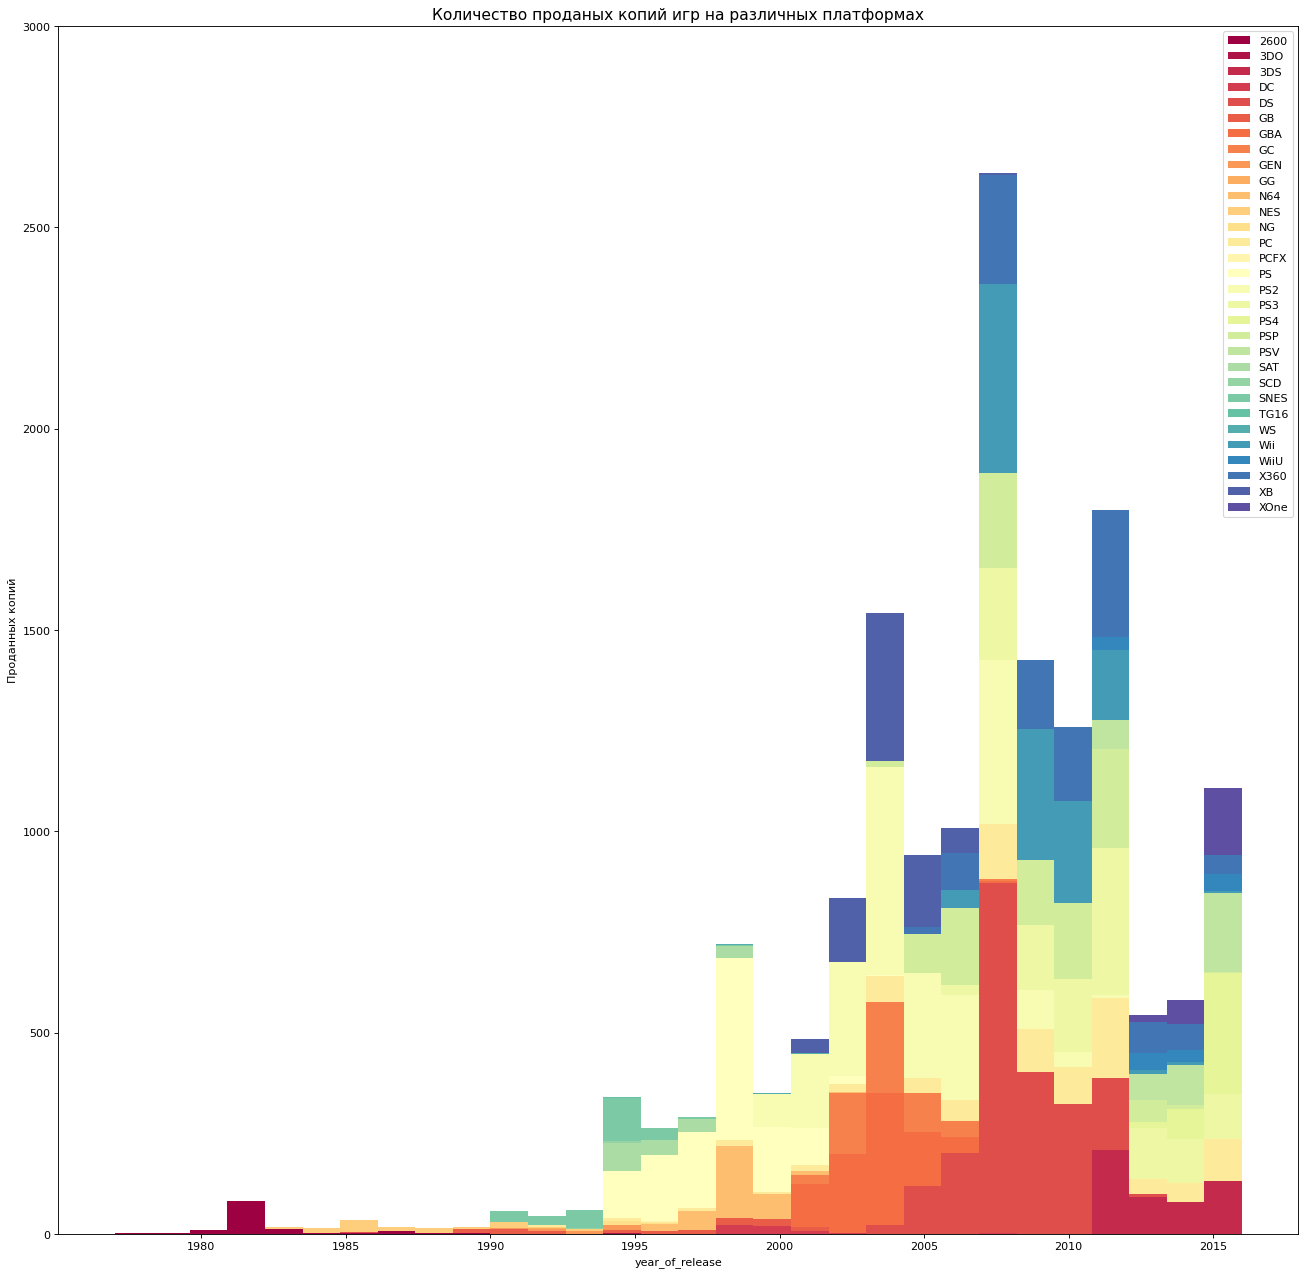

In [30]:
plt.figure(figsize=(20,20), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])
#
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title("Количество проданых копий игр на различных платформах", fontsize=14)
plt.xlabel(x_var)
plt.ylabel("Проданных копий")
plt.ylim(0,3000)

plt.show()


<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

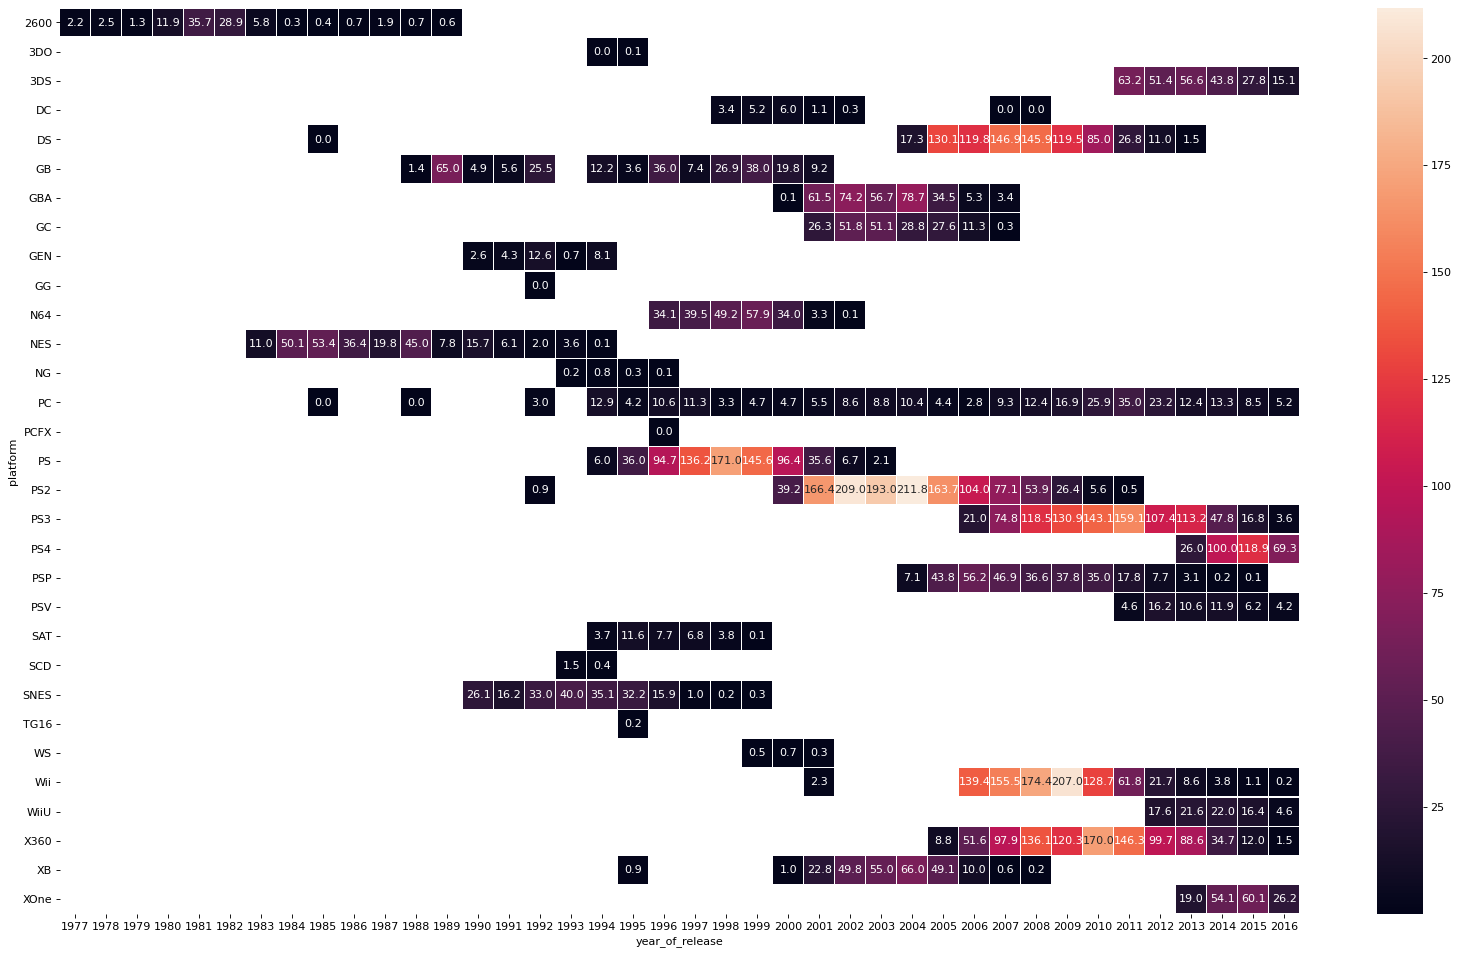

In [31]:
platform_year_of_release_sales = df.pivot_table(
                        index='platform', 
                        columns='year_of_release', 
                        values='world_sales', 
                        aggfunc=sum).applymap(float)
plt.figure(figsize=(25,15), dpi= 80)
sns.heatmap(platform_year_of_release_sales, annot=True, fmt=".1f", linewidths=.25)

    Продажи в зависимости от платформы сильно менялись по годам. 
        Первые игры на платформе "Atari 2600" появились в 1977 году и продавались до 1989 года, пик продаж был в 1981 году, когда во всем мире продали 35.7 млн копий.
        1983 году У Atari появился конкурент в лице Nintendo Entertainment System (сокращённо NES), которя продавалась до 1994 года, для NES характерно 2 пика в 84-85 годах(50.1-53.4 млн. копий) и 88году с 45 млн копий.
        В 90-ых годах появляются такие платформы как Game Boy (GB), Sega Mega Drive (GEN),Nintendo GameCube(NG),Super Nintendo Entertainment System (SNES) и другие. "Жили" данные платформы от 4 до 13 лет.
        В 1994 году Sony начинает выпускать серию PlayStation, которая становится одной из самых успешных игровых платформ, 10 лет идут продажи игр этой платформы с пиком в 98 году с 171 млн. копий, с 2000 вышла легендарная  PS2, которая стала самая продаваемой в истории консолью. Через 6 лет в 2006 году выходит PS3, а в 2013 -PS4.
        В 2001 году выходит конкурент от Microsoft - Xbox, 2005 - X360, Xone- 2013 году.Как и серией PS консоль остается актуальной в течение 10 лет.
        В конце 2008 года выходит Nintendo DS, которая оставалась актуально 10 лет, а в 2011 выходит Nintendo 3DS.
        В 2004 выходит PSP, игры до которых остаются актуальными до 2015 года.
        В 2006 - Wii популярность которой закончилась в 2016 году.
        Обособленым остается персональный компьютер (PC), активно игры начинают продаваться с 1992 года и остаются актуальным по сей день, но надо понимать, что компьютеры технически меняются со временем.
        Продажи игр для большинства платформ имееют нормальное распределение, у некоторых пик смещен влево.
        Игры для платформ в среднем выпускались около 8-10 лет, исключением является PC, технически который меняются, но название остается.
       

## Актуальный период

### Определение актуального периода

В 2013 выходят современные Хone и  PS4, которые будут основными игроками на рынке консолей и оталкиваясь от данных по прошлым платформам будут оставаться активными до начала 20ых годов.Дальше в иссследовании мы не будем учитывайте в работе данные за предыдущие годы.

In [32]:
#Скопируем игры с 2013 по 2016 оба включительно, в новый датайфрейм.
actual_df=df.query('year_of_release >= 2013').copy(deep=True)

### Платформы

In [33]:
aggfunc_=['count','sum','mean','median','min','max']
platform_sales_actual=actual_df.pivot_table(index=['year_of_release', 'platform'],
               values='world_sales',
               fill_value=0,
               aggfunc=aggfunc_)
platform_sales_actual.sort_values(by=['year_of_release'],ascending=False)
#platform_sales_actual.sort_values(by=['year_of_release','world_sales'],ascending=False)

count         sum        mean      median  \
                         world_sales world_sales world_sales world_sales   
year_of_release platform                                                   
2016            XOne              87       26.15        0.30        0.06   
                PSV               85        4.25        0.05        0.03   
                PC                54        5.25        0.10        0.04   
                PS3               38        3.60        0.09        0.07   
                PS4              164       69.25        0.42        0.08   
                3DS               46       15.14        0.33        0.08   
                Wii                1        0.18        0.18        0.18   
                WiiU              14        4.60        0.33        0.21   
                X360              13        1.52        0.12        0.10   
2015            3DS               86       27.78        0.32        0.09   
                XOne              80       60.14        0.75        0.24   
                X360              35       11.96        0.34        0.18   
                WiiU              28       16.35        0.58        0.22   
                Wii                4        1.14        0.28        0.09   
                PSV              110        6.25        0.06        0.03   
                PSP                3        0.12        0.04        0.02   
                PS4              137      118.90        0.87        0.18   
                PS3               73       16.82        0.23        0.05   
                PC                50        8.52        0.17        0.08   
2014            XOne              61       54.07        0.89        0.44   
                WiiU              31       22.03        0.71        0.13   
                Wii                6        3.75        0.62        0.37   
                PSV              100       11.90        0.12        0.07   
                PSP               10        0.24        0.02        0.01   
                PS4               75      100.00        1.33        0.60   
                PS3              108       47.76        0.44        0.16   
                PC                47       13.28        0.28        0.10   
                3DS               80       43.76        0.55        0.09   
                X360              63       34.74        0.55        0.23   
2013            DS                 8        1.54        0.19        0.15   
                PSP               54        3.14        0.06        0.03   
                PC                38       12.38        0.33        0.17   
                PS3              126      113.25        0.90        0.31   
                PS4               16       25.99        1.62        1.53   
                XOne              19       18.96        1.00        0.80   
                PSV               63       10.59        0.17        0.10   
                Wii               12        8.59        0.72        0.18   
                WiiU              42       21.65        0.52        0.22   
                X360              75       88.58        1.18        0.43   
                3DS               91       56.57        0.62        0.10   

                                 min         max  
                         world_sales world_sales  
year_of_release platform                          
2016            XOne            0.01        2.65  
                PSV             0.01        0.30  
                PC              0.01        0.65  
                PS3             0.01        0.73  
                PS4             0.01        7.60  
                3DS             0.01        7.14  
                Wii             0.18        0.18  
                WiiU            0.01        1.03  
                X360            0.02        0.38  
2015            3DS             0.01        3.32  
                XOne            0.01        7.39  
                X360            0.01        1.70

In [34]:
platform_sales_actual=actual_df.pivot_table(index=['year_of_release', 'platform'],
               values='world_sales',
               fill_value=0,
               aggfunc=sum)

platform_sales_actual.sort_values(by=['year_of_release','world_sales'],ascending=False)

world_sales
year_of_release platform             
2016            PS4             69.25
                XOne            26.15
                3DS             15.14
                PC               5.25
                WiiU             4.60
                PSV              4.25
                PS3              3.60
                X360             1.52
                Wii              0.18
2015            PS4            118.90
                XOne            60.14
                3DS             27.78
                PS3             16.82
                WiiU            16.35
                X360            11.96
                PC               8.52
                PSV              6.25
                Wii              1.14
                PSP              0.12
2014            PS4            100.00
                XOne            54.07
                PS3             47.76
                3DS             43.76
                X360            34.74
                WiiU            22.03
                PC              13.28
                PSV             11.90
                Wii              3.75
                PSP              0.24
2013            PS3            113.25
                X360            88.58
                3DS             56.57
                PS4             25.99
                WiiU            21.65
                XOne            18.96
                PC              12.38
                PSV             10.59
                Wii              8.59
                PSP              3.14
                DS               1.54

<AxesSubplot:xlabel='year_of_release', ylabel='world_sales'>

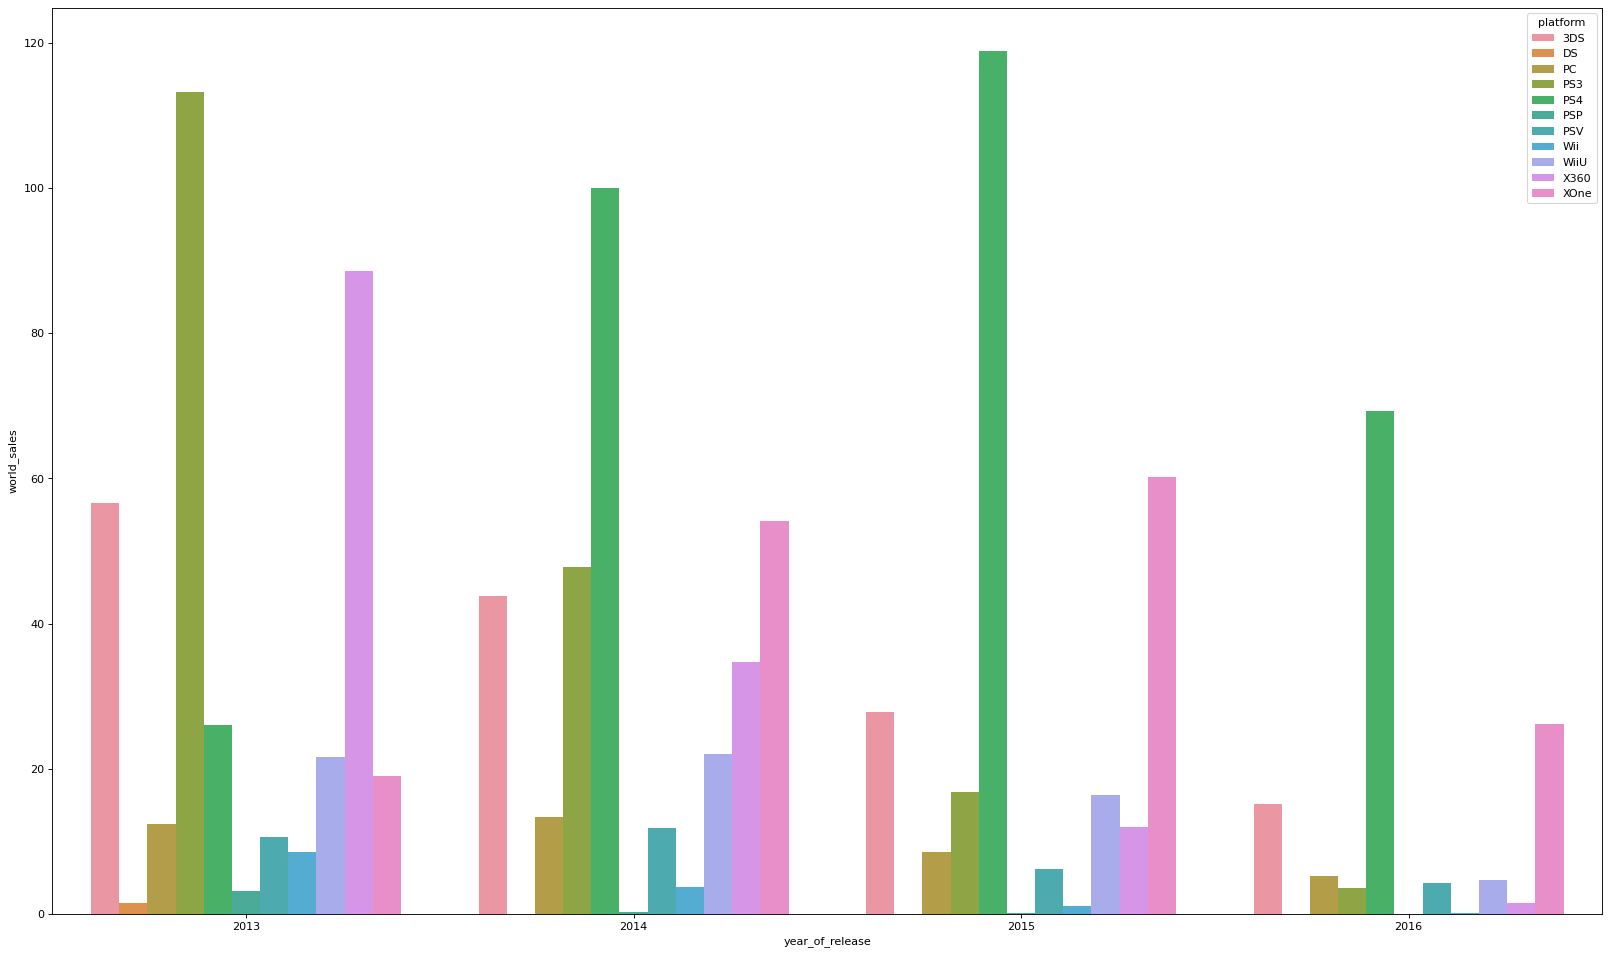

In [35]:
plt.figure(figsize=(25,15), dpi= 80)
sns.barplot(data=platform_sales_actual.reset_index(), x='year_of_release', y='world_sales', hue='platform')


<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

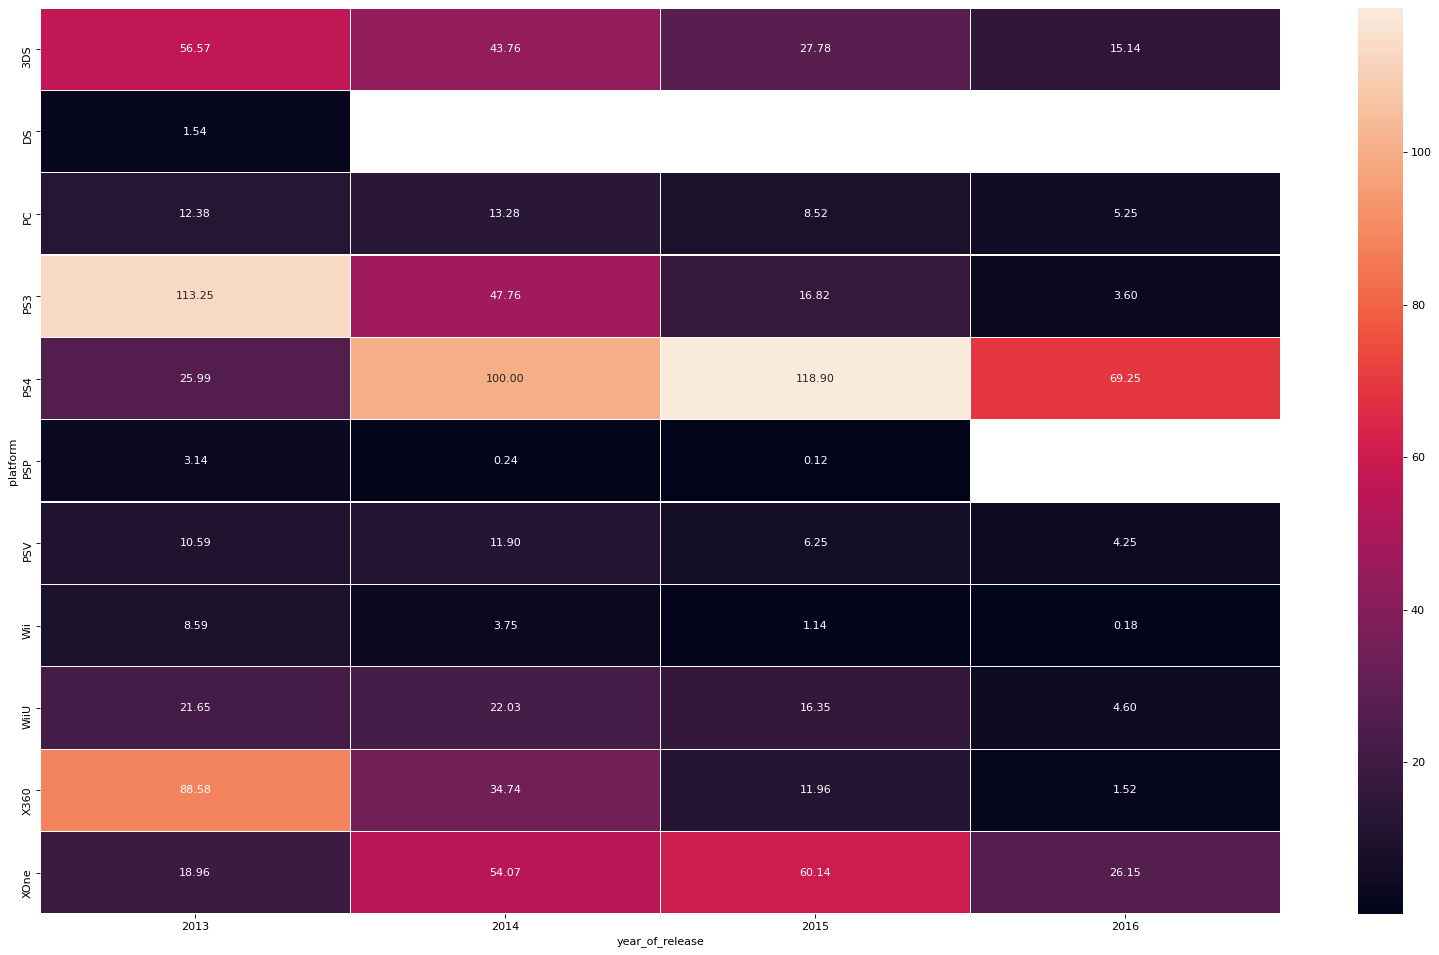

In [36]:
platform_year_of_release_sales = actual_df.pivot_table(
                        index='platform', 
                        columns='year_of_release', 
                        values='world_sales', 
                        aggfunc=sum).applymap(float)
plt.figure(figsize=(25,15), dpi= 80)
sns.heatmap(platform_year_of_release_sales, annot=True, fmt=".2f", linewidths=.25)

<AxesSubplot:xlabel='world_sales', ylabel='platform'>

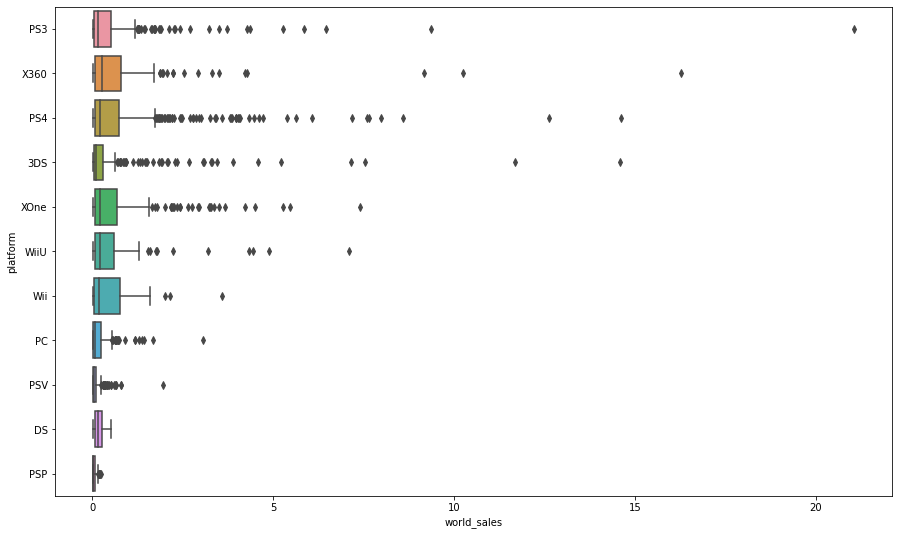

In [37]:
plt.figure(figsize=(15, 9))
actual_platforms = actual_df.platform.value_counts().sort_values(ascending = False).index.values
sns.boxplot(y="platform", x="world_sales", data=actual_df[actual_df.platform.isin(actual_platforms)], orient="h",)

    В актальный период есть данные о играх на 11 платформах. Большая часть игр имеют продажи меньше 500 тыс. копий в мире.Для большинства платформ есть особенно популярные игры которые делают большую кассу.
    Популярность PS3 и X360 снижается им на смену приходят PS4 и Xone. С меньшей скоростью снижается популярность 3DS, PSV и остальных

[(0.0, 2.0)]

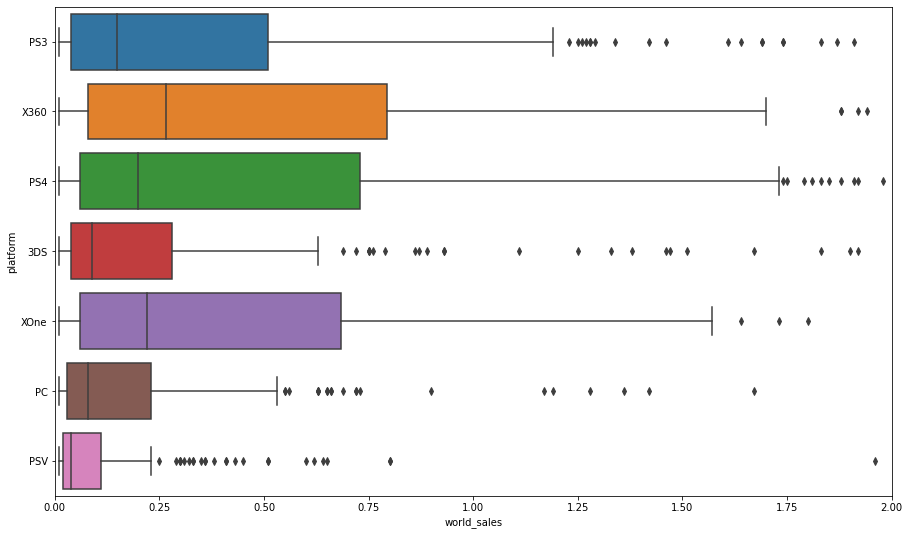

In [38]:
#отсортируем выделим топ 5 и приблизим график
plt.figure(figsize=(15, 9))
actual_platforms = actual_df.platform.value_counts().sort_values(ascending = False).head(7).index.values
(sns.boxplot(y="platform", x="world_sales", data=actual_df[actual_df.platform.isin(actual_platforms)], orient="h")
           .set (xlim=(0, 2)))

Даже если выделить топ5 платформ, то больше 50% игр продаются меньше 750 тыс. копий, медианое значение наибольшее у  Xone (250 тыс. копий), немного уступет медианое значение для PS4 и PS3 (240 тыс проданных копий)

### Оценки прессы и игроков

In [39]:
score_corr=actual_df[(actual_df['critic_score']!= -1)&(actual_df['user_score']!= -1)]


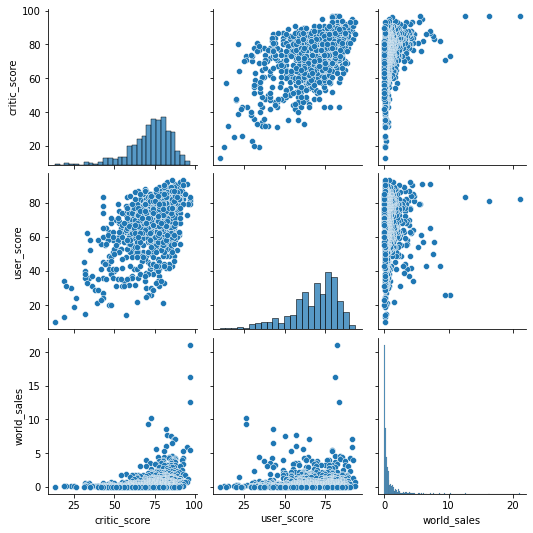

In [40]:
cols = ['critic_score', 'user_score',"world_sales"]
sns_plot = sns.pairplot(score_corr[cols])

In [41]:
#Создадим датафрейм в котором будут только игры на платформе ПС4 и будут указаны оценки прессы и игроков. 
PS4_score_corr=actual_df[(actual_df['critic_score']!= -1)&(actual_df['user_score']!= -1)&(actual_df['platform']== 'PS4')]
PS4_score_corr.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,world_sales
count,249.00,249.00,249.00,249.00,249.00,249.00,249.00,249.00
mean,"2,015.06",0.34,0.45,0.04,0.15,72.13,67.50,0.98
std,0.91,0.57,0.89,0.07,0.26,12.55,14.56,1.65
min,"2,013.00",0.00,0.00,0.00,0.00,19.00,15.00,0.01
25%,"2,014.00",0.02,0.03,0.00,0.01,66.00,61.00,0.08
50%,"2,015.00",0.09,0.12,0.01,0.04,74.00,70.00,0.30
75%,"2,016.00",0.39,0.45,0.05,0.17,80.00,78.00,1.10
max,"2,016.00",3.96,6.31,0.49,1.97,97.00,92.00,12.62


<Figure size 800x640 with 0 Axes>

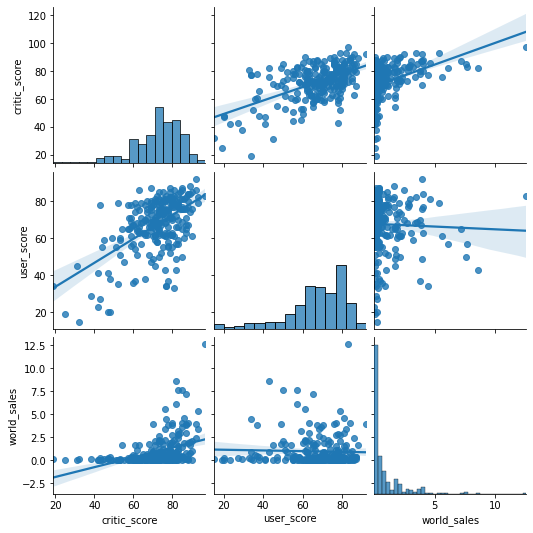

              critic_score  user_score  world_sales
critic_score          1.00        0.56         0.41
user_score            0.56        1.00        -0.03
world_sales           0.41       -0.03         1.00


In [42]:
plt.figure(figsize=(10,8), dpi= 80)
cols = ['critic_score', 'user_score',"world_sales"]
sns.pairplot(PS4_score_corr[cols], kind="reg", )
plt.show()
print(PS4_score_corr[cols].corr())

In [43]:
#посмотрим взаимосвязь дли игр с меньше 1 млн копий
actual_df[cols].loc[((actual_df['user_score']!= -1)&
                     (actual_df['platform']== 'PS4')&
                     (actual_df['world_sales']< 1)&
                     (actual_df['critic_score']!= -1)
                    )].corr()

,critic_score,user_score,world_sales
critic_score,1.00,0.64,0.31
user_score,0.64,1.00,-0.02
world_sales,0.31,-0.02,1.00


    По графиику расспределения, для игр на ПС4 можно выделить заметную линейную взаимосвязь между оценками игроков и оценками игровых критиков,коэффициент корреляции Пирсона: 0.56.
    Есть умереная линейная взаимосвязь между оценками прессы и количеством проданых копий, коэффициент корреляции Пирсона: 0.41. По графику можно отметить, что в диапазоне 60-100 баллов, лучше прослеживается
    Линейной взаимосвязи между оценками игроков и продажами коэффициент корреляции Пирсона не показывает.Но на графике распределения можно увидеть линейную связь между играми с большим количеством продаж и хорошо принятыми игроками играми с оценками в районе 80 баллов 
    Медианое значение равно 300 тыс проданных копий, а среднее 980 тыс копий, что свидетельстует о сильном вляниее наиболее популярных игр.

In [44]:
#PS3_score_corr=actual_df[(actual_df['critic_score']!= -1)&(actual_df['user_score']!= -1)&(actual_df['platform']== 'PS3')]
#print(PS3_score_corr[cols].corr())
#cols = ['critic_score', 'user_score',"world_sales",'platform']
#sns_plot = sns.pairplot(score_corr[cols],hue='platform')

---
3DS
---


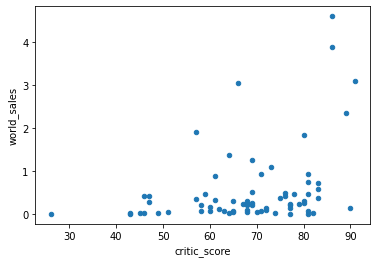

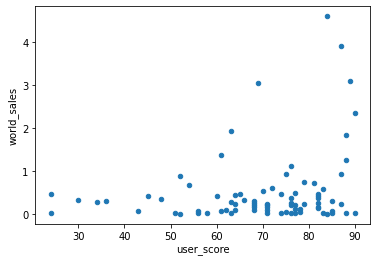

              critic_score  user_score  world_sales
critic_score          1.00        0.77         0.34
user_score            0.77        1.00         0.27
world_sales           0.34        0.27         1.00
---
DS
---


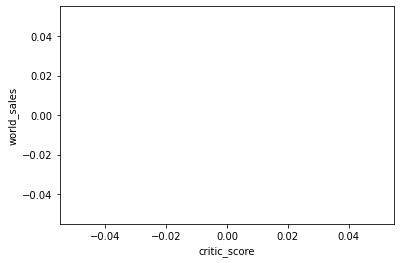

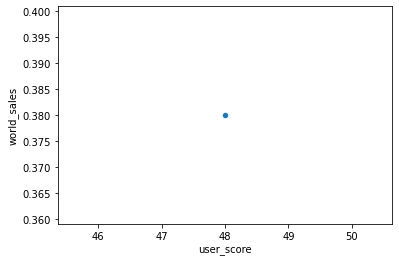

              critic_score  user_score  world_sales
critic_score           NaN         NaN          NaN
user_score             NaN         NaN          NaN
world_sales            NaN         NaN          NaN
---
PC
---


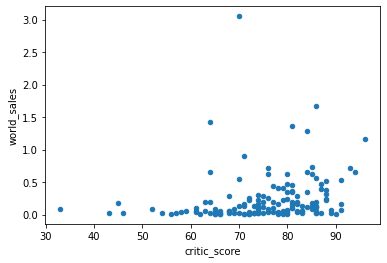

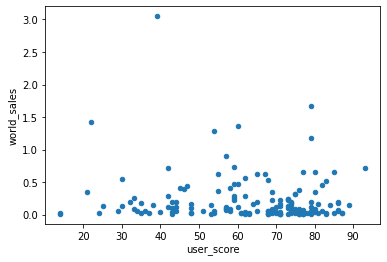

              critic_score  user_score  world_sales
critic_score          1.00        0.43         0.19
user_score            0.43        1.00        -0.11
world_sales           0.19       -0.11         1.00
---
PS3
---


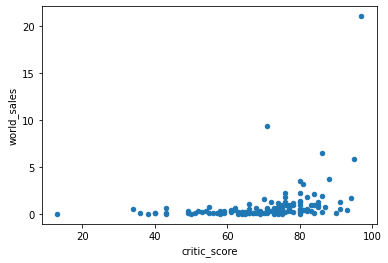

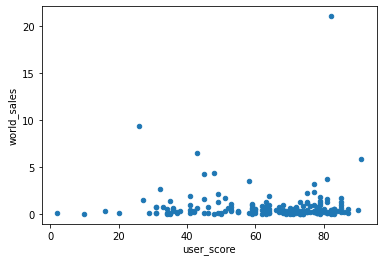

              critic_score  user_score  world_sales
critic_score          1.00        0.60         0.33
user_score            0.60        1.00         0.02
world_sales           0.33        0.02         1.00
---
PS4
---


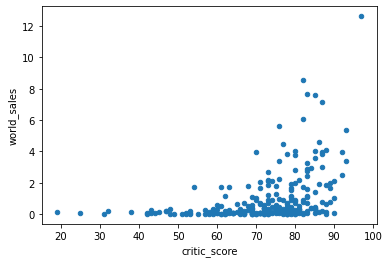

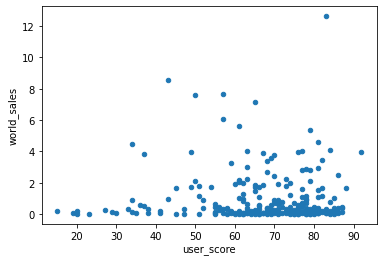

              critic_score  user_score  world_sales
critic_score          1.00        0.56         0.41
user_score            0.56        1.00        -0.03
world_sales           0.41       -0.03         1.00
---
PSP
---


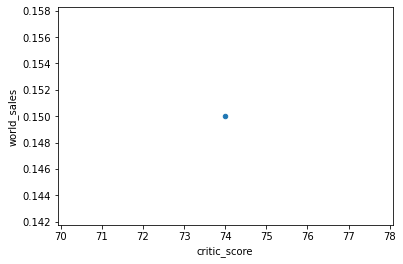

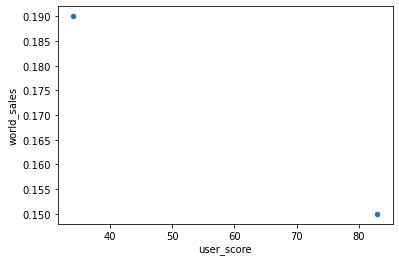

              critic_score  user_score  world_sales
critic_score           NaN         NaN          NaN
user_score             NaN         NaN          NaN
world_sales            NaN         NaN          NaN
---
PSV
---


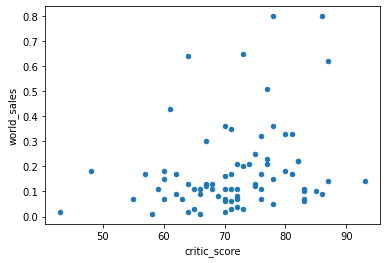

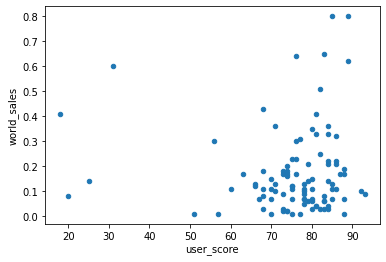

              critic_score  user_score  world_sales
critic_score          1.00        0.61         0.25
user_score            0.61        1.00         0.27
world_sales           0.25        0.27         1.00
---
Wii
---


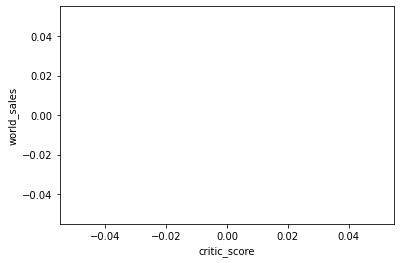

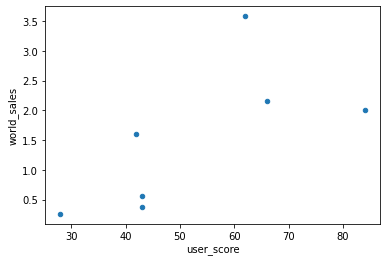

              critic_score  user_score  world_sales
critic_score           NaN         NaN          NaN
user_score             NaN         NaN          NaN
world_sales            NaN         NaN          NaN
---
WiiU
---


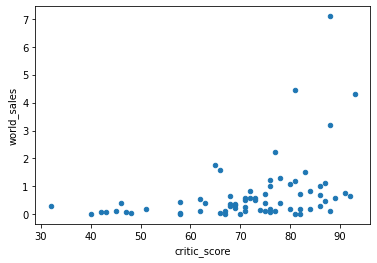

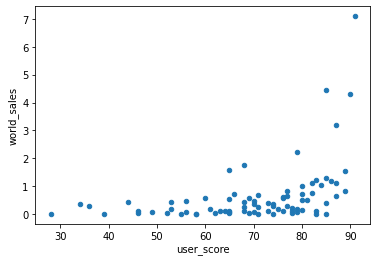

              critic_score  user_score  world_sales
critic_score          1.00        0.72         0.38
user_score            0.72        1.00         0.41
world_sales           0.38        0.41         1.00
---
X360
---


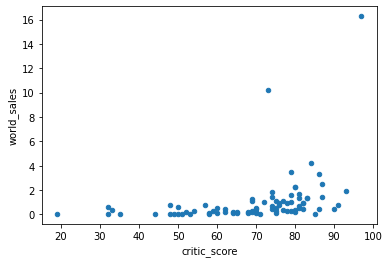

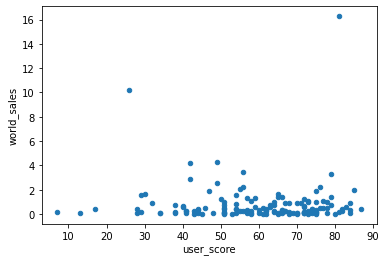

              critic_score  user_score  world_sales
critic_score          1.00        0.52         0.35
user_score            0.52        1.00        -0.01
world_sales           0.35       -0.01         1.00
---
XOne
---


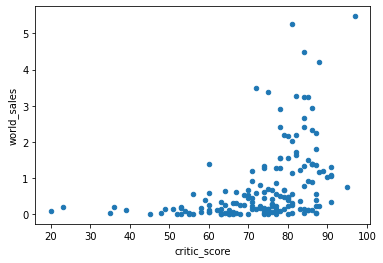

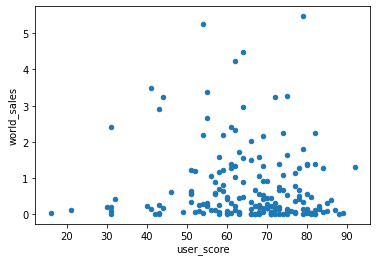

              critic_score  user_score  world_sales
critic_score          1.00        0.47         0.41
user_score            0.47        1.00        -0.09
world_sales           0.41       -0.09         1.00


In [45]:
#создадим цикл который будет создавать графики для разных популярных платформ 
cols = ['critic_score', 'user_score',"world_sales"]
# для кортежа из игр с отфильроваными пропусками в оценках в сгрупированых данных по платформам сторим графики распределения между,
#оценками прессы и игроков и продажами по всему миру
# Хотел еще что бы он выводил сколько игр попало, но так и не получилось 
for p, score_corr in actual_df.groupby('platform'):
    print('---')
    print(p)
    print('---')
    score_corr[score_corr['critic_score'] != -1].plot(
        kind='scatter', 
        x='critic_score', 
        y='world_sales',
        )
    score_corr[score_corr['user_score'] != -1].plot(
        kind='scatter',
        x='user_score',
        y='world_sales')
    plt.show()
# Посмототрим оэффициент корреляции Пирсона между ними 
    print(score_corr[cols][(score_corr['critic_score'] != -1) & (score_corr['user_score'] != -1)].corr())

In [46]:
#actual_df.loc[((actual_df['user_score']!= -1)&(actual_df['platform']== 'PC')&(actual_df['world_sales']> 1.5))]
#actual_df.loc[((actual_df['user_score']!= -1)&(actual_df['platform']== 'PS3')&(actual_df['world_sales']> 1.5))]
                     

    Сравним взаимосвязь между оценками игроков ,оценками игровых критиков и продажами для других платформ:
        3DS-Линейной взаимосвязи между оценками игровых критиков и продажами умереная, оценками игрокови продажами слабая.
        DS-слишко мало значений в выборке
        PC- Взаимосвязь между оценками критиков и продажами слабее чем у ПС4, из за особо популярной игры The Sims 4, с низкой оценкой от игроков, взаимосвзять между рейтингом игроков и продажами стала сильнее отрицательнее, чем если убрать из выборки самые продваемые игры
        PS3-Взаимосвязь между оценками критиков и продажами слабее чем у ПС4,Сильное влияние оказывают  Grand Theft Auto V с отличными продажами и оценками и Call of Duty: Ghosts с провальными оценками у игроков и хорошо принятой прессой.
        PSP -слишко мало значений в выборке
        PSV -Взаисосвязь между оценками критиков и игроков с продажами слабая и практически одинаковая
        Wii- слишко мало значений в выборке
        WiiU-Взаисосвязь между оценками критиков и игроков с продажами умеренная и практически одинаковая
        X360-Взаисосвязь между оценками критиков с продажами умеренная, Взаимосвязь с оценками игроков не выявлена.
        XOne-Взаисосвязь между оценками критиков с продажами умеренная, Взаимосвязь с оценками игроков не выявлена.
    В тексте взаимосвязь = линейной зависимости.
        В целом можно отметить, что для игр у которых есть оценки критиков и игроков, зависимость больше от оценки прессы, чем от игроков. Сильное влияние оказывают наиболее продоваемые игры и их оценки. При более детальном анализе лучше выделить игры с близкими значениями по продажам в отдельные группы и смотреть взаимосвязи по ним.
        
        
        
        
    

In [47]:
#print(len(actual_df[(actual_df['critic_score']!= -1)&(actual_df['user_score']!= -1)]))

#print(len(actual_df[actual_df['platform']== 'Wii']))


In [48]:
#actual_df[(actual_df['user_score']!= -1)&(actual_df['platform']== 'Wii')]

### Жанры

<AxesSubplot:xlabel='world_sales', ylabel='genre'>

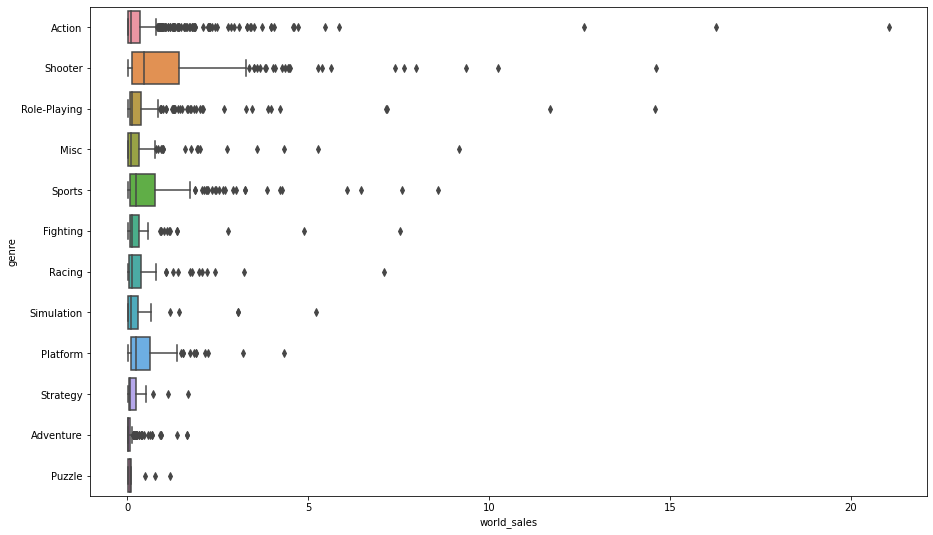

In [49]:

plt.figure(figsize=(15, 9))
actual_platforms = actual_df.platform.value_counts().sort_values(ascending = False).index.values
sns.boxplot(y="genre", x="world_sales", data=actual_df[actual_df.platform.isin(actual_platforms)], orient="h",)

[(0.0, 2.0)]

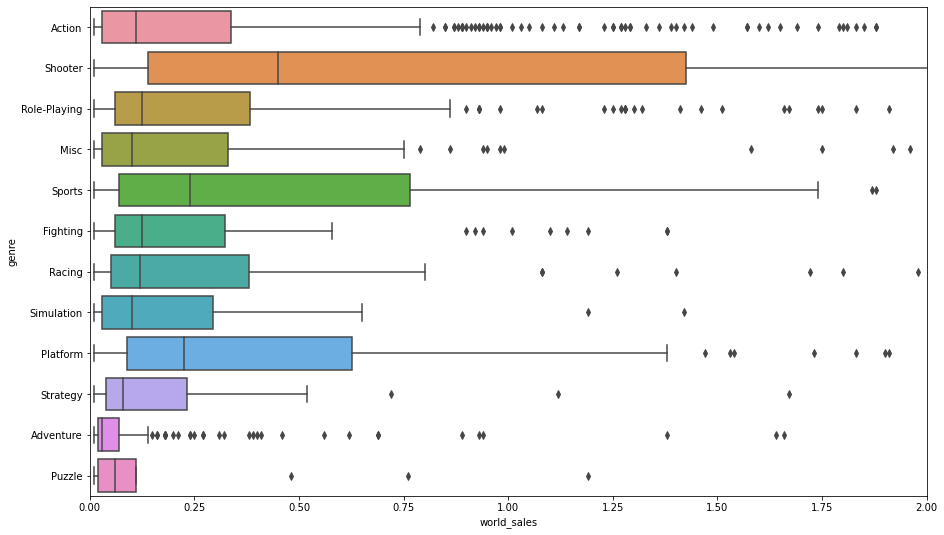

In [50]:
plt.figure(figsize=(15, 9))
actual_platforms = actual_df.platform.value_counts().sort_values(ascending = False).index.values
sns.boxplot(y="genre", x="world_sales", data=actual_df[actual_df.platform.isin(actual_platforms)], orient="h",).set (xlim=(0, 2))

<AxesSubplot:xlabel='genre', ylabel='platform'>

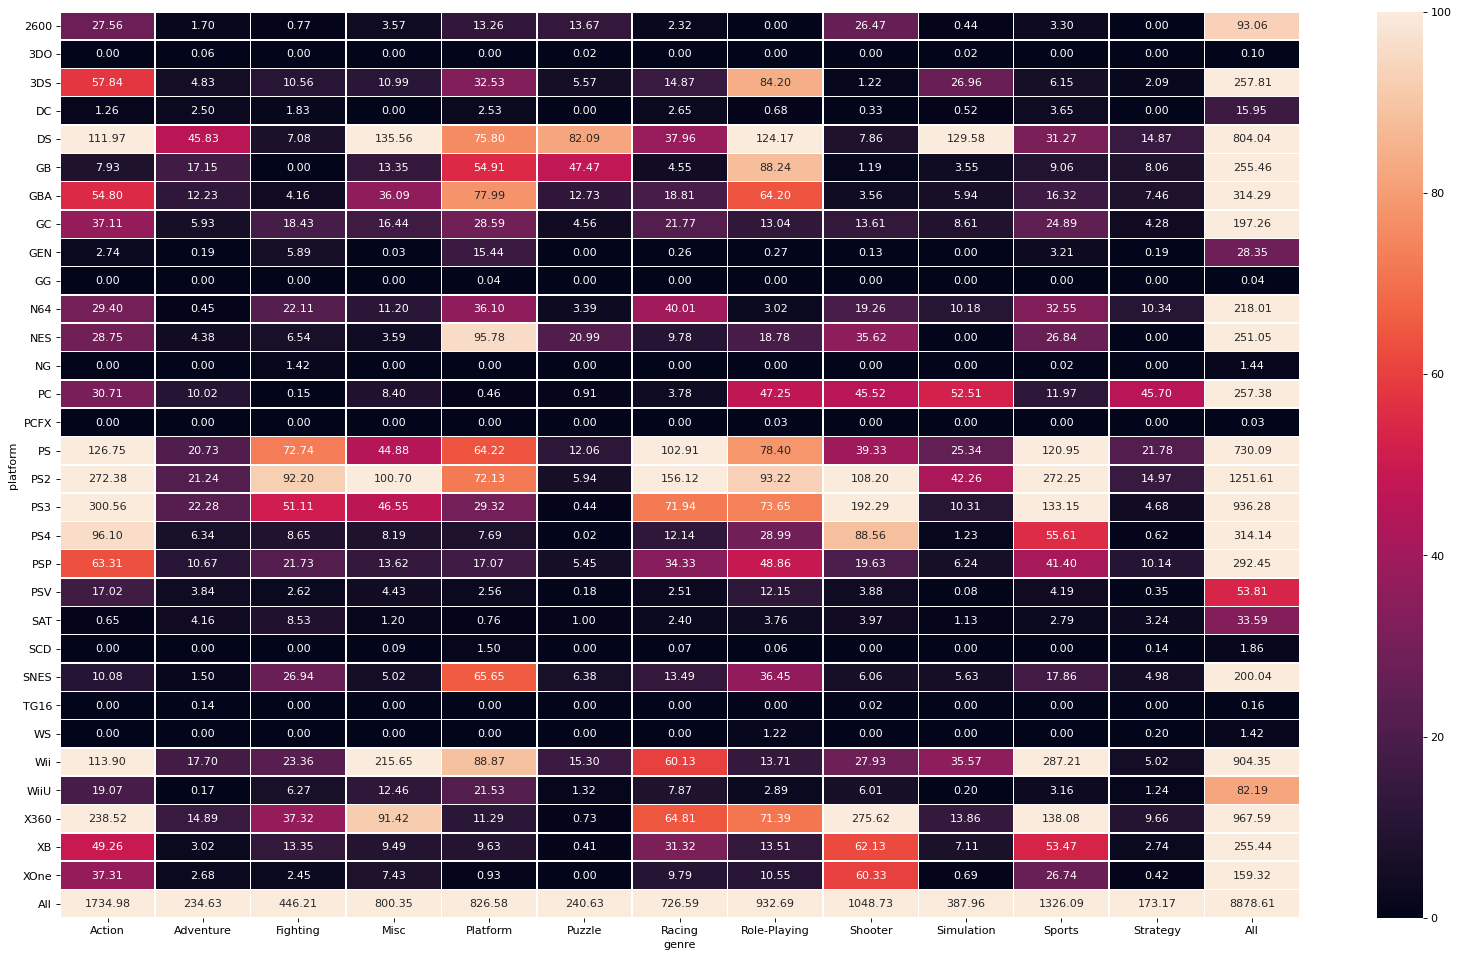

In [51]:
plt.figure(figsize=(25,15), dpi= 80)
platform_genre_sales = df.pivot_table(
                        index='platform', 
                        columns='genre', 
                        values='world_sales',
                        margins=True,
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".2f", linewidths=.5, vmax=100)


<AxesSubplot:xlabel='genre', ylabel='platform'>

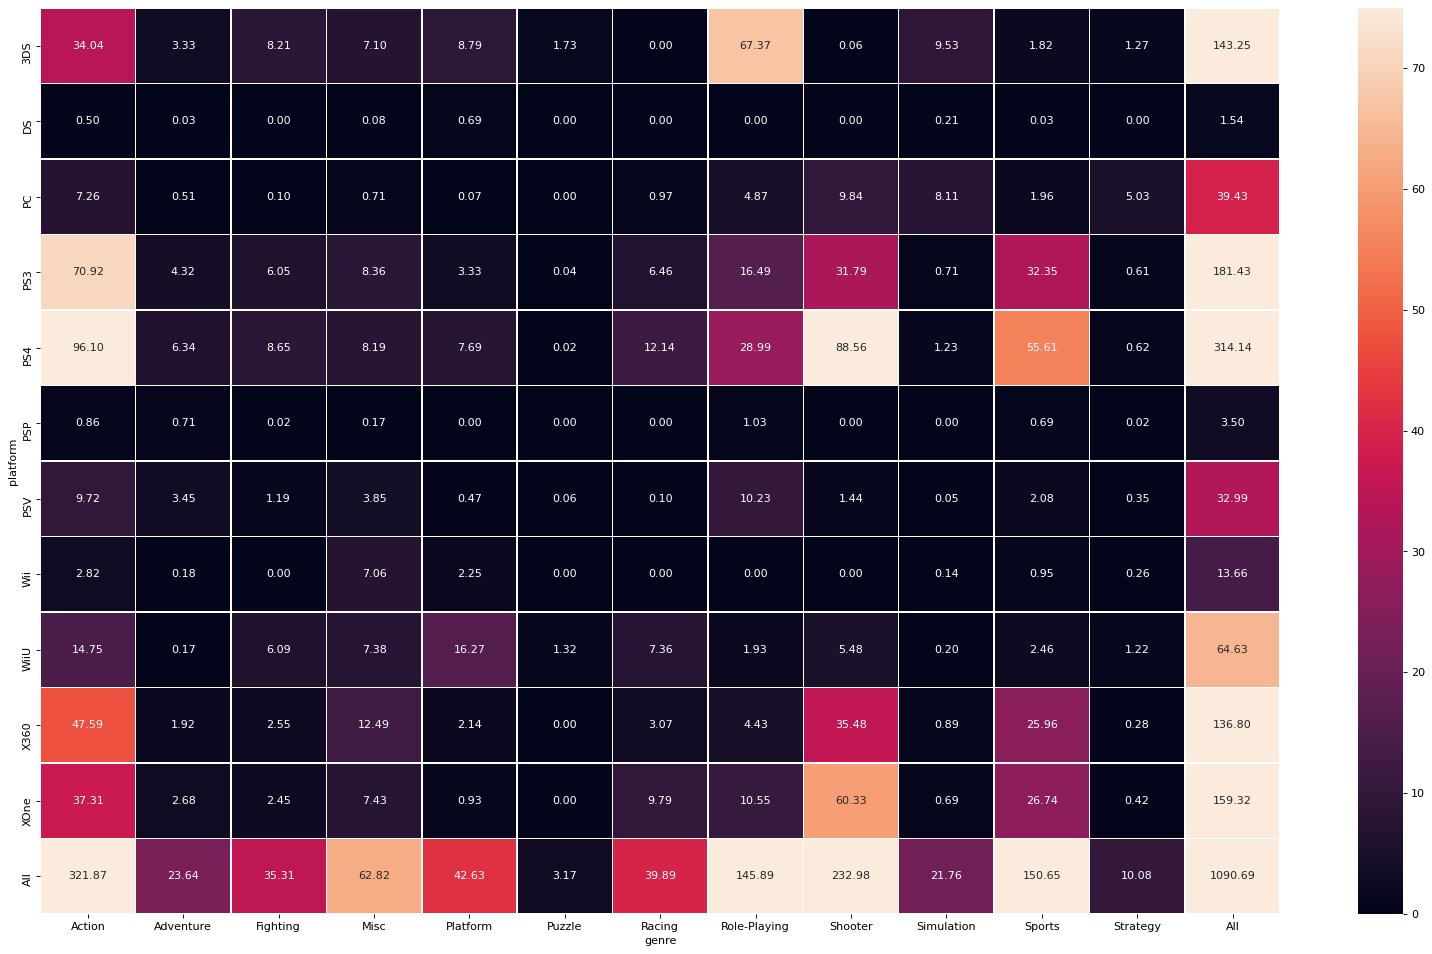

In [52]:
plt.figure(figsize=(25,15), dpi= 80)
platform_genre_sales = actual_df.pivot_table(
                        index='platform', 
                        columns='genre', 
                        values='world_sales',
                        margins=True,
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".2f", linewidths=.5, vmax=75)

<AxesSubplot:xlabel='genre', ylabel='platform'>

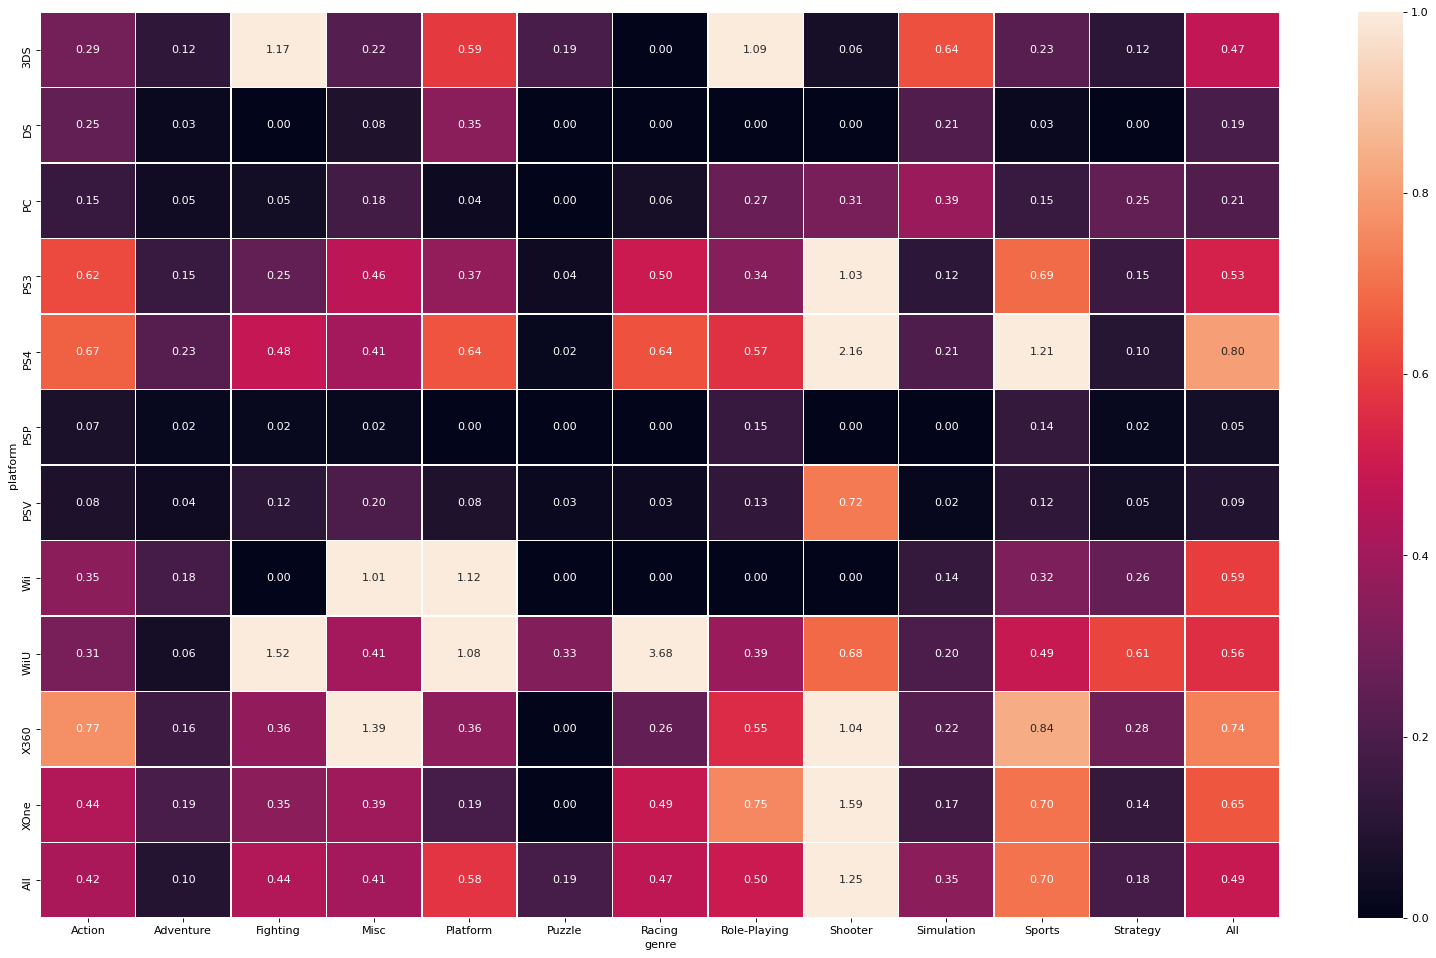

In [53]:
plt.figure(figsize=(25,15), dpi= 80)
platform_genre_sales = actual_df.pivot_table(
                        index='platform', 
                        columns='genre', 
                        values='world_sales',
                        margins=True,
                        aggfunc=np.mean).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".2f", linewidths=.5, vmax=1)

    Игры делят на 12 жанров, С 2013 по 2016 было продано более 1 млрд игр, Самые популярные жанры: 
        Экшен (322 млн.копий)
        Шутеры(233 млн.копий)
        Спортивные(151 млн.копий)
        Компьютерные ролевые игры(146 млн.копий)
        Misc (63 млн.копий)
    К самым непопулярным жанрам, можно отнести:
        Симуляторы(21.8 млн.копий)
        Стратегии(10.1 млн.копий)
        Пазлы (3.2 млн.копий)
    По среднему кол-во проданных копий лидером является жанр Шутеры (1.25 млн. копий),Спортивные (0.70 млн. копий) и Платформеры (0.58 млн. копий), что свидетельствует о небольшом проценте сверх успешных игр в жанре Экшен.
    Жанровые предпочтение игроков  менялись во времени и зависят от платформы.
    
    
    

### Региональные различия

#### Региональные различия по платформам

In [54]:
print(actual_df.platform.value_counts().sort_values(ascending = False).head(5).index.values)
print(actual_df.genre.value_counts().sort_values(ascending = False).head(5).index.values)
top6_platforms=['PS4','PSV', 'PS3', '3DS', 'XOne','X360']
top5_genre=['Action', 'Role-Playing', 'Adventure', 'Sports', 'Shooter']

['PS4' 'PSV' 'PS3' '3DS' 'XOne']
['Action' 'Role-Playing' 'Adventure' 'Sports' 'Shooter']


In [56]:
def top5_p(row):
    if row['platform'] in top6_platforms:
        return row['platform']
    else:
        return 'Other'

In [57]:
actual_df['top5_platforms'] = actual_df.apply(top5_p, axis=1)

<AxesSubplot:ylabel='jp_sales'>

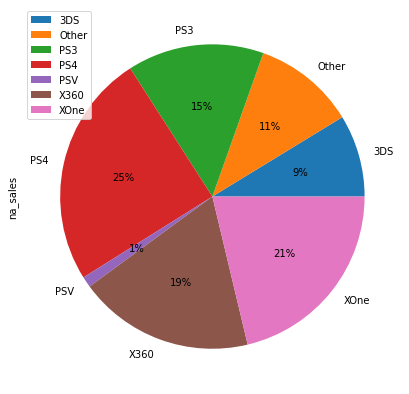

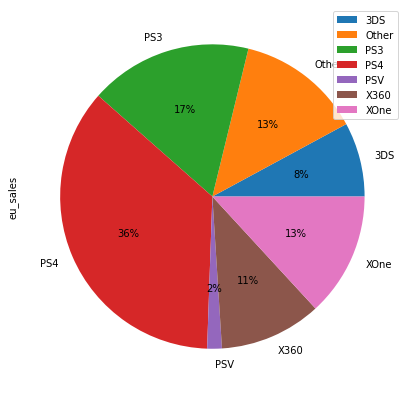

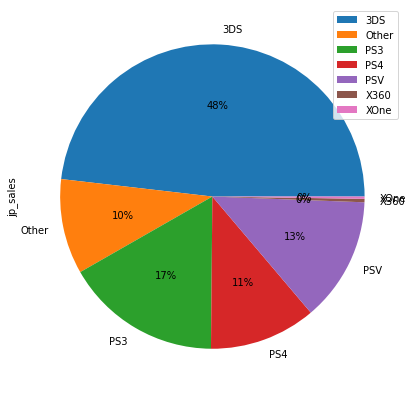

In [58]:
actual_df.groupby(['top5_platforms']).sum().plot(figsize=(7, 7),
    kind='pie', y='na_sales', autopct='%1.0f%%')
actual_df.groupby(['top5_platforms']).sum().plot(figsize=(7, 7),
    kind='pie', y='eu_sales', autopct='%1.0f%%')
actual_df.groupby(['top5_platforms']).sum().plot(figsize=(7, 7),
    kind='pie', y='jp_sales', autopct='%1.0f%%')

Региональные различия в Топ 6 игровых платформ в играх 2013-2016 года выпусков заметны. Для рынка США и Европы самой популярной платформой является ПС4, для японского региона- 3DS. При некой схожести рынка США и Европы, приставки от Sony контролирую 53% рынка Европы и 40% рынка США, где большую конкуренцию ему состовляют приставки от Майкрософта  занимающие теже 40% рынка, постепено с падением продаж Х360, доля приставок Сони на рынке США будет увеличиваться. Рынок Японии сильно отичается от рынков США и Европы. Nintendo 3DS контролирует практически половину рынка, если прибавить к ней долю так же карманой приставки PlayStation Vita, то можно говорить о 61 % доли рынка. На втором месте приставки от Сони с 28% рынка.

#### Региональные различия по жанрам

In [59]:
def top5_g(row):
    if row['genre'] in top5_genre:
        return row['genre']
    else:
        return 'Other'
actual_df['top5_genre'] = actual_df.apply(top5_g, axis=1)    

<AxesSubplot:ylabel='jp_sales'>

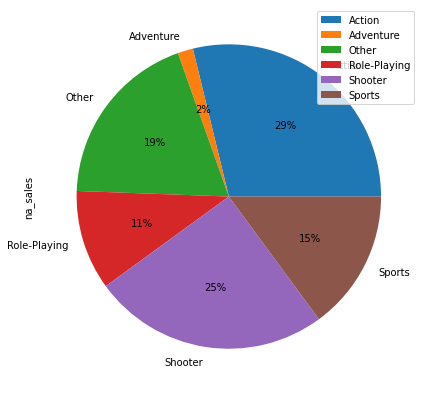

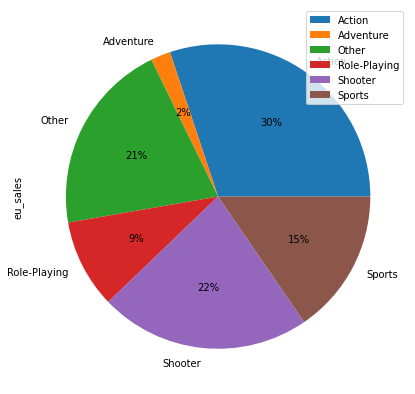

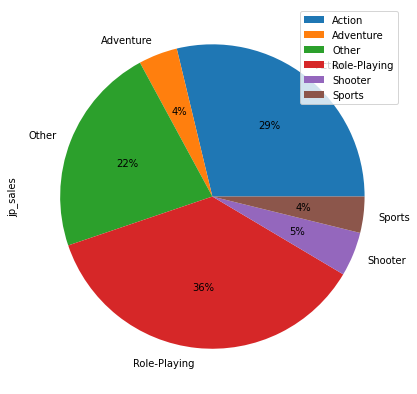

In [60]:
actual_df.groupby(['top5_genre']).sum().plot(figsize=(7, 7),
    kind='pie', y='na_sales', autopct='%1.0f%%')
actual_df.groupby(['top5_genre']).sum().plot(figsize=(7, 7),
    kind='pie', y='eu_sales', autopct='%1.0f%%')
actual_df.groupby(['top5_genre']).sum().plot(figsize=(7, 7),
    kind='pie', y='jp_sales', autopct='%1.0f%%')

Жанровые предпочтения игроков США и Европы практически совпадают, с лидерующими жанрами Экшеном и Шутерами и Спортивными играми. Японские игроки и тут отличаются предпочитая Ролевые игры и Экшены и меньше играя иШутры и спортивные игры. 

#### Региональные различия по возрастным жанрам

<AxesSubplot:ylabel='jp_sales'>

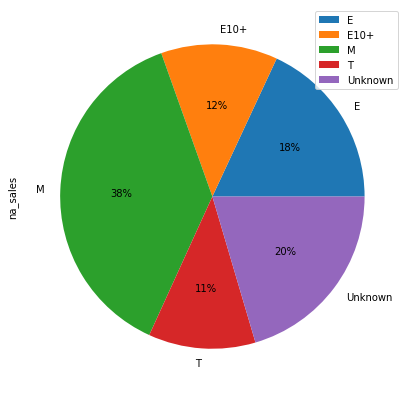

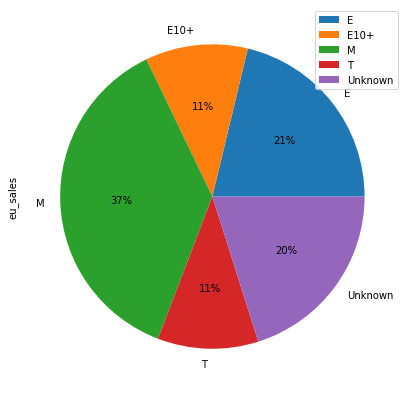

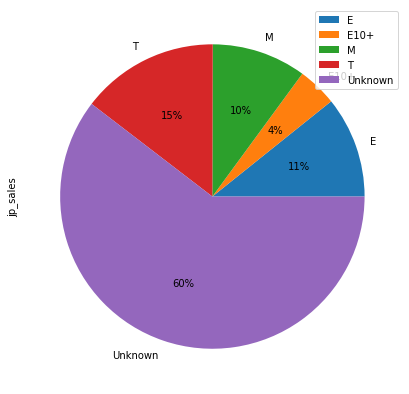

In [61]:
actual_df.groupby(['rating']).sum().plot(figsize=(7, 7),
    kind='pie', y='na_sales', autopct='%1.0f%%')
actual_df.groupby(['rating']).sum().plot(figsize=(7, 7),
    kind='pie', y='eu_sales', autopct='%1.0f%%')
actual_df.groupby(['rating']).sum().plot(figsize=(7, 7),
    kind='pie', y='jp_sales', autopct='%1.0f%%')

    Рынки США и Европы практически не различимы друг от друга и передпочитают игры для взрослых , а на втором месте игры для всех от 10 лет и старше , а на третьем для всех.
    Так как Entertainment Software Association устанавливающая данные рейтинг имеет сильное влияние в США и Европе, то 80% игр указывают рейтинг в этих регионах, а на японском рынке, только 40% указали данный рейтинг.  

#### Портрет пользователя каждого региона

    Игроки США и Европы во многом схожи, большинсво играет на платформах которые подключаются к ТВ, в США платформы от Майкрософт контралируют чуть большую долю рынка чем в Европе, но и там и там более популярны платформы от Сони. Жанровые предпотения этих 2 стран так же схожи и около 70% сотавляют игры в жанре Шутер, Экшен и Спорт. С рейтингом ESRB все строго в этих регионах, большинсво копий игр выходят с буквой М для взрослых.  
    Рынок Японии самобытен более 60% которого составляют корманые платформы, платформам от Майкрософт не удалось зайьти на местный рынок. Любимый жанр японских игроков это ролевые компютерные игры и Экшен. Более 60% не указывают рейтинг ESRB. А среди указвших лидирует игры для подростков.
    

### Проверка гипотез

     Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
     Альтерантивная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [62]:
hypothesis_1 = actual_df[actual_df['user_score'] != -1]

print('Средняя оценка игр от геймеров на  платформе Xbox One', round(hypothesis_1.query('platform == "XOne"')['user_score'].mean(),2))
print('Средняя оценка игр от геймеров на  платформе PC', round(hypothesis_1.query('platform == "PC"')['user_score'].mean(),2))
print('---')

results = st.ttest_ind(
    hypothesis_1.query('platform == "XOne"')['user_score'], 
    hypothesis_1.query('platform == "PC"')['user_score'], 
    equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя оценка игр от геймеров на  платформе Xbox One 65.21
Средняя оценка игр от геймеров на  платформе PC 62.7
---
p-значение: 0.1475959401343053
Не получилось отвергнуть нулевую гипотезу


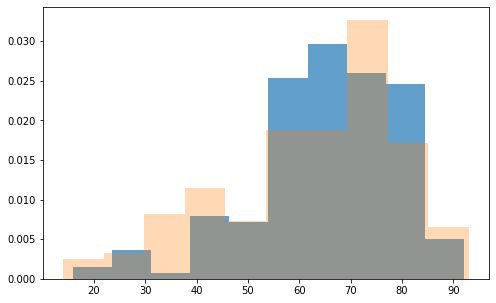

In [63]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(hypothesis_1[(hypothesis_1.platform == "XOne")]['user_score'], bins=10, density=True, alpha=0.7)
ax.hist(hypothesis_1[(hypothesis_1.platform == "PC")]['user_score'], bins=10, density=True, alpha=0.3)
plt.show()

Нет статистических оснований отвергнуть нулевую гипотизу на выбраном уровне значимости. 


    Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые.
    Альтерантивная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются.

In [64]:
print('Средняя оценка игр от геймеров в жанре экшен', round(hypothesis_1.query('genre == "Action"')['user_score'].mean(),2))
print('Средняя оценка игр от геймеров в жанре спортивных игр', round(hypothesis_1.query('genre == "Sports"')['user_score'].mean(),2))
print('---')

results = st.ttest_ind(
    hypothesis_1.query('genre == "Action"')['user_score'], 
    hypothesis_1.query('genre == "Sports"')['user_score'], 
    equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя оценка игр от геймеров в жанре экшен 68.38
Средняя оценка игр от геймеров в жанре спортивных игр 52.38
---
p-значение: 1.446003970070494e-20
Отвергаем нулевую гипотезу


Есть статистических оснований отвергнуть нулевую гипотизу на выбраном уровне значимости.

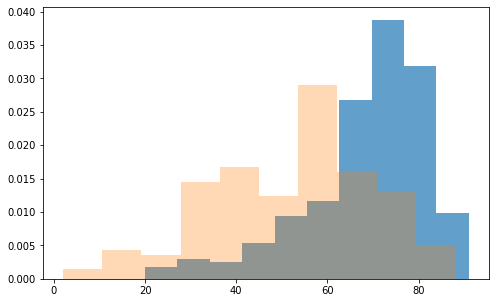

In [65]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(hypothesis_1[(hypothesis_1.genre == "Action")]['user_score'], bins=10, density=True, alpha=0.7)
ax.hist(hypothesis_1[(hypothesis_1.genre == "Sports")]['user_score'], bins=10, density=True, alpha=0.3)
plt.show()

## Вывод

    Первей две игры выпустили в  1977 году до начала 90-ых годов выпускали незначительное кол-во игр. Затем начался взрывной рост до  2008-2009 года до 1432 игр ежегодно, а затем достаточно быстро началось снижаться, спад остановился в 2013, после кол-во выпускаемых игр снова начло расти.Данные за 2016 не полные.
    В ходе предобработки данных мы удалили всего 213 строчек с пропусками или 1.3% от исходных данных. Больше всего пропусков было в стобцах с оценкой прессы и игроков , а так же в графе с возрастными ограничениями.
    В данных представлена информация о 31 платформе, игры для платформ в среднем выпускались около 8-10 лет, исключением является PC, техничеси которые меняются, но название остается.В 2013 году выходят современые платформы основных конкурентов Сони и Майкрасофт из за чего мы выбрали актуальный период начиная с этого года.    
    В актальный период есть данные о играх на 11 платформах. Большая часть игр имеют продажи меньше 500 тыс. копий в мире.Для большинства платформ есть особенно популярные игры которые делают основную долю продаж.Популярность PS3 и X360 снижается им на смену приходят PS4 и Xone. С меньшей скоростью снижается популярность 3DS, PSV и остальных.
    Даже у самых популярных платформ 50% игр продаются меньше 750 тыс. копий, медианое значение наибольшее у Xone (250 тыс. копий), немного уступет медианое значение для PS4 и PS3 (240 тыс проданных копий).
    Для PS4 есть умереная линейная взаимосвязь между оценками прессы и количеством проданых копий, коэффициент корреляции Пирсона: 0.41. Для оценок пользователей тако взаимосвязи нет.
    Остальные платформы в целом показывают схожую картину.Выделяется WiiU у которой взаисосвязь между оценками критиков и игроков с продажами умеренная и практически одинаковая.Для более подробного иследования влияния рейтинга лучше разделить самые популярные игры и наиболее типичные игры по кол-ву проданых копий. 
    Игры делят на 12 жанров, С 2013 по 2016 было продано более 1 млрд игр, Самые популярные жанры: 
        Экшен (322 млн.копий)
        Шутеры(233 млн.копий)
        Спортивные(151 млн.копий)
        Компьютерные ролевые игры(146 млн.копий)
        Misc (63 млн.копий)
    К самым непопулярным жанрам, можно отнести:
        Симуляторы(21.8 млн.копий)
        Стратегии(10.1 млн.копий)
        Пазлы (3.2 млн.копий)
    В по среднему показателю лидером является жанр Шутеры (1.25 млн. копий),Спортивные (0.70 млн. копий) и Платформеры (0.58 млн. копий), что свидетельствует о небольшом проценте сверх успешных игр в жанре Экшен.Жанровые предпочтение игроков  менялись во времени и зависят от платформы.
        Игроки США и Европы во многом схожи, большинсво играет на платформах которые подключаются к ТВ, в США платформы от Майкрософт контралируют чуть большую долю рынка чем в Европе, но и там и там более популярны платформы от Сони. Жанровые предпотения этих 2 стран так же схожи и около 70% сотавляют игры в жанре Шутер, Экшен и Спорт. С рейтингом ESRB все строго в этих регионах, большинсво копий игр выходят с буквой М для взрослых.  
    Рынок Японии самобытен более 60% которого составляют корманые платформы, платформам от Майкрософт не удалось зайьти на местный рынок. Любимый жанр японских игроков это ролевые компютерные игры и Экшен. Более 60% не указывают рейтинг ESRB. А среди указвших лидирует игры для подростков.
    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    Средние пользовательские рейтинги жанров Action и Sports различаются.
    Спасибо за внимаение, было интересно.

    
    
    
    
    
    
    